In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Download necessary NLTK datasets
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [3]:
# Load the dataset (dataset source: https://www.kaggle.com/datasets/fastcurious/twitter-new-dataset-2024-march-data)
df = pd.read_json('tweets.json')

df.head()

,type,id,url,twitterUrl,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,...,bookmarkCount,isReply,author,extendedEntities,entities,isRetweet,isQuote,media,quoteId,quote
0,tweet,1762265250987201024,https://x.com/FmGuerralves/status/176226525098...,https://twitter.com/FmGuerralves/status/176226...,"""Historic visit by French Minister for Home Af...",0,0,1,0,25.0,...,0,False,"{'type': 'user', 'userName': 'FmGuerralves', '...",{'media': [{'display_url': 'pic.twitter.com/vU...,"{'hashtags': [{'indices': [131, 138], 'text': ...",False,False,[https://pbs.twimg.com/media/GHTS4jca4AAbb7m.j...,NaN,NaN
1,tweet,1762265102085165568,https://x.com/CynthiaGur93764/status/176226510...,https://twitter.com/CynthiaGur93764/status/176...,😐😙😆🧏‍♀️😩👨‍🦱\n wear interview sometimes fast co...,0,0,0,0,NaN,...,0,False,"{'type': 'user', 'userName': 'CynthiaGur93764'...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,False,[],NaN,NaN
2,tweet,1762264840154857472,https://x.com/nelsonakange/status/176226484015...,https://twitter.com/nelsonakange/status/176226...,The Directorate of Technical Cooperation in Af...,0,1,0,0,44.0,...,0,True,"{'type': 'user', 'userName': 'nelsonakange', '...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,False,[],NaN,NaN
3,tweet,1762264888053821696,https://x.com/NikolajMeedom/status/17622648880...,https://twitter.com/NikolajMeedom/status/17622...,It almost seems that a foreign policy based on...,0,0,1,0,32.0,...,0,False,"{'type': 'user', 'userName': 'NikolajMeedom', ...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,True,[],1.762170e+18,"{'type': 'tweet', 'id': '1762170363306201342',..."
4,tweet,1762264739139510784,https://x.com/GaryGevisser/status/176226473913...,https://twitter.com/GaryGevisser/status/176226...,Subject: Reason for optimism is that it is now...,0,1,0,0,46.0,...,0,True,"{'type': 'user', 'userName': 'GaryGevisser', '...",{},"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",False,False,[],NaN,NaN


## Exploring Preprocessing

Tokenisation is the process of splitting a text into smaller units, such as words or terms. 

Stopwords are trivial words like “I”, “the”, “you”, etc. that appear so frequently in the text that they may distort many NLP operations without adding much valuable information. So almost always you will have to remove stopwords from the corpus as part of your preprocessing.

Lemmatisation means reducing a word to its base or root form. For example, the word “running” is lemmatised to “run”.

Stemming is similar to lemmatisation, but it is a crude rule-based process that could produce words that are not valid in the language. E.g, "Territories" becomes "territori".

In [4]:
import re
def clean_tweet(tweet):
    # Replace HTML entities
    tweet = re.sub(r'&amp;', '&', tweet)
    
    # Remove URLs
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)
    
    # Remove emojis
    # tweet = re.sub(r'[\U00010000-\U0010ffff]', '', tweet)
    
    return tweet

# Select a sample tweet
example_tweet = clean_tweet(df['text'].iloc[0])
print(f"Original Tweet:\n{example_tweet}\n")

# Tokenisation
tokens = word_tokenize(example_tweet)
print(f"After Tokenization:\n{tokens}\n")

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print(f"After Removing Stopwords:\n{filtered_tokens}\n")

# Removing punctuation
filtered_tokens_no_punctuation = [word for word in filtered_tokens if word.isalnum()]
print(f"After Removing Punctuation:\n{filtered_tokens_no_punctuation}\n")

# Lemmatisation 
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens_no_punctuation]
print(f"After Lemmatization:\n{lemmatized_tokens}\n")

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens_no_punctuation]
print(f"After Stemming:\n{stemmed_tokens}\n")


Original Tweet:
"Historic visit by French Minister for Home Affairs & Overseas Territories, @GDarmanin, to Australia, marking a new chapter in #France-#Australia cooperation. Engaging discussions on climate resilience in Pacific, cybercrime, civil protection, and police collaboration. 🇫🇷🇦🇺 

After Tokenization:
['``', 'Historic', 'visit', 'by', 'French', 'Minister', 'for', 'Home', 'Affairs', '&', 'Overseas', 'Territories', ',', '@', 'GDarmanin', ',', 'to', 'Australia', ',', 'marking', 'a', 'new', 'chapter', 'in', '#', 'France-', '#', 'Australia', 'cooperation', '.', 'Engaging', 'discussions', 'on', 'climate', 'resilience', 'in', 'Pacific', ',', 'cybercrime', ',', 'civil', 'protection', ',', 'and', 'police', 'collaboration', '.', '🇫🇷🇦🇺']

After Removing Stopwords:
['``', 'Historic', 'visit', 'French', 'Minister', 'Home', 'Affairs', '&', 'Overseas', 'Territories', ',', '@', 'GDarmanin', ',', 'Australia', ',', 'marking', 'new', 'chapter', '#', 'France-', '#', 'Australia', 'cooperation', '

## Preprocessing

In [5]:
def clean_and_process_tweet(tweet):
    # Clean tweet
    tweet = re.sub(r'&amp;', '&', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet)
    # Tokenization
    tokens = word_tokenize(tweet)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Removing punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Lowercase
    tokens = [word.lower() for word in tokens]
    return tokens

df['processed_tweets'] = df['text'].apply(clean_and_process_tweet)

## Explorative Data Analysis (EDA)
- Frequency distribution of words
- Word cloud
- Textblob
- Tweet length distribution
- LDA

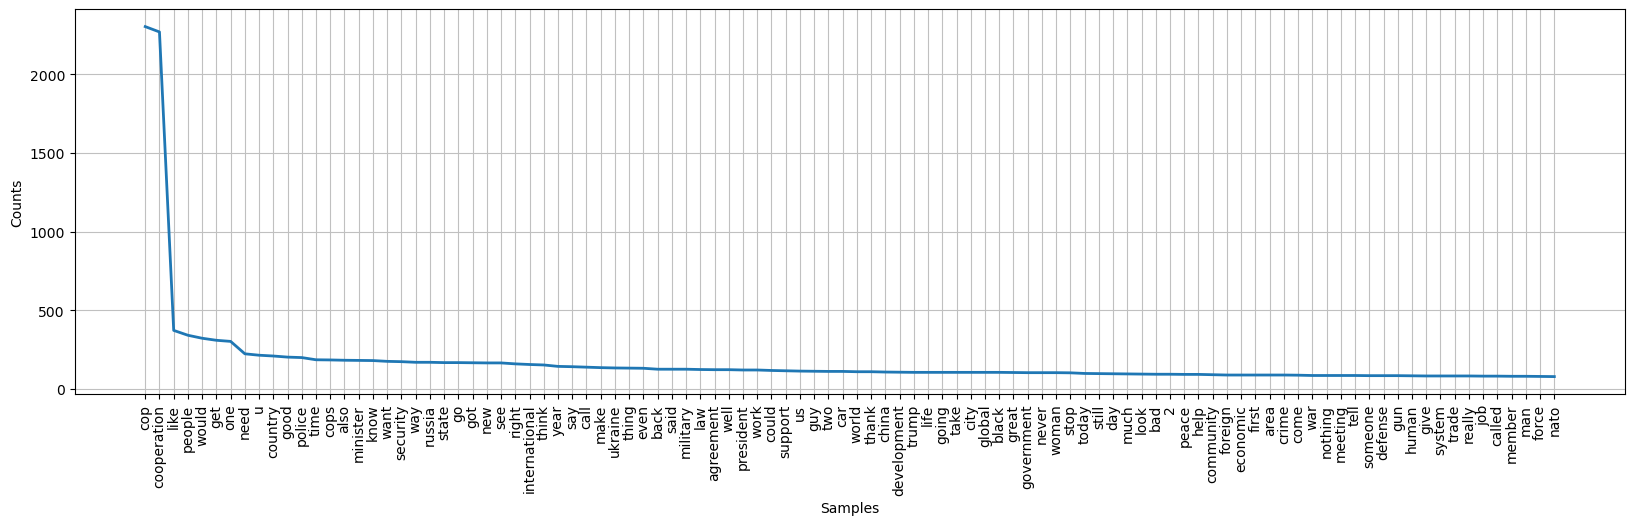

In [6]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# Flatten the list of processed tweets to a single list containing all words
all_words = [word for tokens in df['processed_tweets'] for word in tokens]

# Compute the frequency distribution of the words
fdist = FreqDist(all_words)

# Plot the most common words
fdist.plot(100, cumulative=False)
plt.show()


/Users/timothychung/opt/anaconda3/envs/ml/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


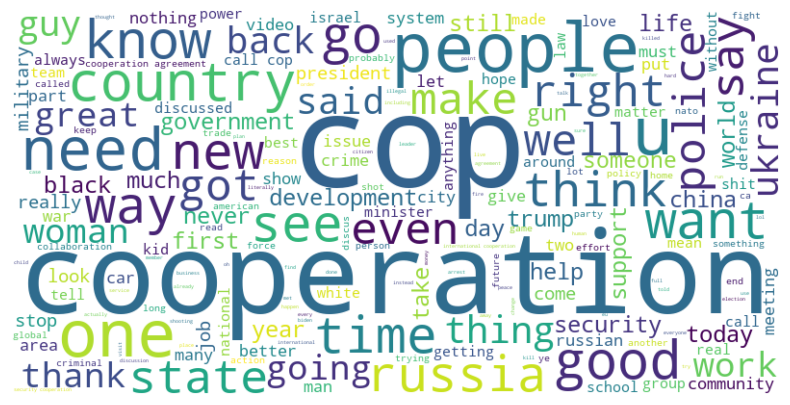

In [7]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: >

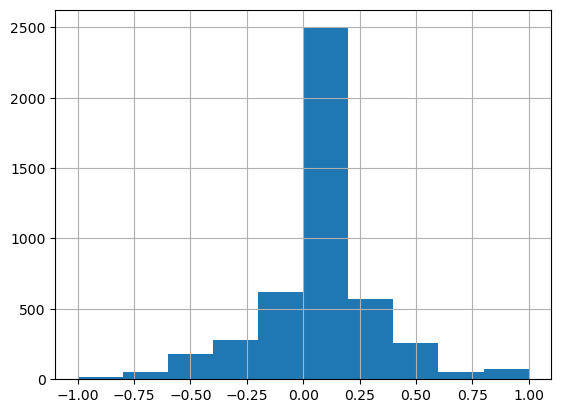

In [8]:
from textblob import TextBlob

# Compute sentiment scores (polarity) and add them to the DataFrame
df['sentiment'] = df['processed_tweets'].apply(lambda tokens: TextBlob(' '.join(tokens)).sentiment.polarity)

# Overview of sentiment distribution
df['sentiment'].hist()


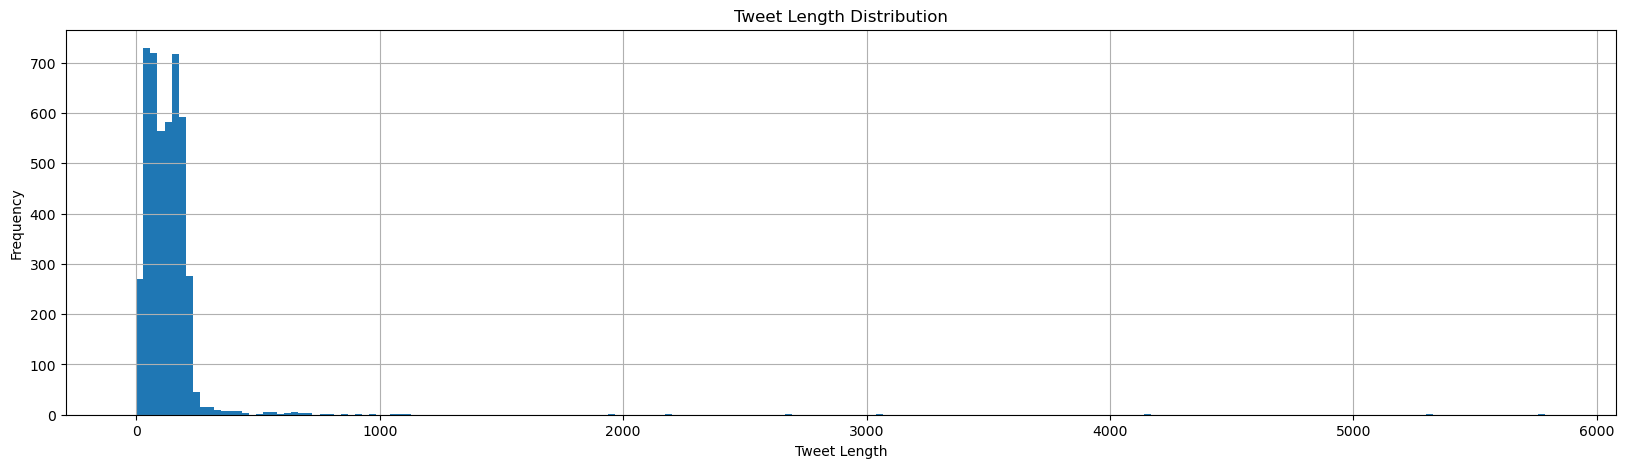

In [9]:
# Calculate tweet lengths
df['tweet_length'] = df['processed_tweets'].apply(lambda x: len(' '.join(x)))


# Plot distribution
plt.figure(figsize=(20, 5))
df['tweet_length'].hist(bins=200)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


## Latent Dirichlet Allocation (LDA)

- LDA is a generative probabilistic model that assumes each document is a mixture of topics and each word in the document is attributable to one of the document’s topics.
- Groups observations into unobserved (i.e., hidden) groups to help explain why certain parts of the data appear similar. 
- Useful in text mining for discovering topics in a corpus

### Problem
- We want to find $K$ topics for a collection of documents
- Each document contains a distribution of topics
- Topics contain a distribution of words related to the topic
- We are doing this unsupervised, so we have no pre-defined topics, 
- At the start, we do not know what topics a document contains
- This is essentially a clustering problem where words and documents are clustered

#### Hierarchical Bayesian Approach
- LDA assumes each document defines a distribution over topics (which could be hidden)
- LDA assumes each topic defines a distribution over words
- The posterior probability of these latent (hidden) variables given a document collection determines a hidden structure.
- This structure decomposes the collection into a set of topics and their associated word distributions.

#### Dirichlet Distribution

The dirichlet distribution is a distribution over the simplex, i.e., positive vectors that sum to one. So $b \sim Dirichlet(\alpha)$ might return $b = [0.1, 0.2, 0.7]$. Parameter $\alpha$ is a vector of positive numbers that determines the mean shape and sparsity e of the distribution. The larger the $\alpha$, the more concentrated the distribution is around the mean.

$$
Dir(\theta|\alpha) = \frac{1}{B(\mathbf{\alpha})} \prod_{k=1}^{K} \theta_{k}^{\alpha_k - 1}\\

B(\mathbf{\alpha}) = \frac{\prod_{k=1}^{K} \Gamma(\alpha_k)}{\Gamma(\sum_{k=1}^{K} \alpha_k)}\\
\alpha = [\alpha_1, \alpha_2, ..., \alpha_K]
$$

where $B(\mathbf{\alpha})$ is the beta function, and $K$ is the number of topics. **Sampling from a Dirichlet distribution returns a vector that represents a multinomial distribution.**

### Generative Model Setup
The LDA assumes a generative process for documents.

- We have $D$ documents
- We have a vocabulary of $V$ words
- We assume $K$ topics
- Each document has a $K$ -dimensional multinomial distribution $\theta_d$ over topics with a common Dirichlet prior $Dirichlet(\alpha)$ (with parameter $\alpha$)
- Each topic has a $V$ -dimensional multinomial distribution $\beta_k$ over words with a common Dirichlet prior $Dirichlet(\beta)$(with parameter $\eta$)

Given the observed words in documents, LDA infers:

- **Topic Assignments ($z_{di}$):** Which topic is responsible for each word.
- **Topic Distributions ($\theta$):** The mix of topics in each document.
- **Word Distributions ($\beta$):** Which words are most likely for each topic.
  
#### Generative Process

- (1) For each topic k, numbered from 1 to K:
  - Draw a multinomial distribution (in the form of a probability vector) $\beta_k \sim Dirichlet(\eta)$ over words
  - $\sum_{v=1}^{V} \beta_{k,v} = 1$ (Sum of all elements in this probability vector is 1)
  - $\beta_{k,v}$ is the probability of word $v$ occurs in topic $k$
  - For each document from 1 to D:
- (2) For each document d, numbered from 1 to D:
  -  Draw a multinomial distribution $\theta_d \sim Dirichlet(\alpha)$ over topics
  - $\sum_{k=1}^{K} \theta_{d,k} = 1$
  - $\theta_{d,k}$ is the probability of topic $k$ occurs in document $d$
  - For each word $w_{d,n}$ in document d:
- (3) For each word $w_{d,n}$ in document d, numbered from 1 to N:
  -  Draw one of $K$ topics $Z_{d,n} \sim Multinomial(\theta_d)$ with $Z_{d,n} \in \{1, 2, ..., K\}$ from step 2 $(\theta_{d,k})$
     - $Z_{d,n}$ is the topic of the word $n$ in document $d$
  - Draw one of $V$ words $w_{d,n} \sim Multinomial(\beta_{Z_{d,n}})$ from step 1 $(\beta_{k,v})$
    - $w_{d,n}$ word $n$ in document $d$. This is the actual word


<img src="lda.png" width="500" ></img>
<br>
Nodes represent random variables, edges indicate dependence. 
Shaded nodes are observed, unshaded nodes are hidden. 

*Image Source: D.Blei and J. Lafferty, Topic Models*



### Goals
LDA trades off two goals.
1. For each document, allocate its words to as few topics as possible $(\alpha)$
   - **$\alpha$ (Document-Topic Density):** Controls the distribution of topics within documents. Higher $\alpha$ values lead to a more even mixture of topics.
   - Putting a document in a single topic goes against (2.), as all of its words must have a probability under that topic
2. For each topic, assign high probability to as few words as possible $(\eta)$
   - Putting very few words in each topic goes against (1.), as to cover a documents's words, it must assign many topics to it
   - **$\eta$ (Topic-Word Density):** Influences how many words are significant for each topic. Lower $\eta$ values make topics more distinct by limiting the set of important words.
  

#### Understanding Hyperparameters ($\alpha$, $\beta$)



Trading off these goals helps find groups of tightly co-occurring words.




### The Inference Problem
Estimation of the LDA model is done in a Bayesian framework. $Dirichlet(\alpha)$ and $Dirichlet(\eta)$ are the prior distributions of $\theta_d$ and $\beta_k$ respectively. The hidden variables are $\theta_{1:D}$, $z_{1:D,1:N}$, and $\beta_{1:K}$.

Posterior distribution of the hidden variables given the observed data:

$$
p(\vec{\theta}_{1:D},z_{1:D,1:N},\vec{\beta}_{1:K}\mid w_{1:D,1:N},\alpha,\eta)=\frac{p(\vec{\theta}_{1:D},\vec{z}_{1:D},\vec{\beta}_{1:K}\mathrm{~;}\vec{w}_{1:D},\alpha,\eta)}{\int_{{\vec{\beta}_{1:K}}}\int_{{\vec{\theta}_{1:D}}}\sum_{{\vec{z}}}p(\vec{\theta}_{1:D},\vec{z}_{1:D},\vec{\beta}_{1:K}\mathrm{~;}\vec{w}_{1:D},\alpha,\eta)}
$$

Problem: The denominator (integral) is intractable to compute.

Solutions: Gibbs Sampling, Variational Inference







# Gibbs Sampling for LDA

This is a form of Monte Carlo Markov Chain (MCMC) method. It is an iterative algorithm that samples from the conditional distributions of the hidden variables given the observed data.

## Representation of Corpus
In Latent Dirichlet Allocation (LDA), a corpus is represented as an array of words $w[i]$, document indices $d[i]$, and topics $z[i]$.

- $w[i]$: Words in the corpus.
- $d[i]$: Document indices, indicating which document a word belongs to.
- $z[i]$: Topics assigned to each word.

**Note:** While the words and their document indices are fixed, the topics $z[i]$ are the variables that change during Gibbs sampling.

## Assigning a New Topic to a Word
When assigning a new topic $z[i]$ to a word $w[i]$, the probability $P(z[i] = j \mid z[-i], w, d)$ is proportional to the product of two probabilities:

1. The probability of word $w[i]$ under topic $j$.
2. The probability of topic $j$ given document $d[i]$.

### Mathematical Representation
The probability is calculated as:

$$
P(z[i] = j \mid z[-i], w, d) \propto \underbrace{\frac{n_{-i,j}(w[i]) + \eta}{\sum_{v=1}^V n_{-i,j}(w_v) + V\eta}}_{\text{Probability of }w_i \text{ under topic }z_i } \times \underbrace{\frac{n_{-i,j}(d[i]) + \alpha}{K\alpha\sum_{k=1}^K n_{-i,j}(d[i]) }}_{\text{Probability of topic } z_i \text{ in document } d[i]}
$$

where:

- $n_{-i,j}(w[i])$ is the frequency of word $w[i]$ being assigned to topic $j$, excluding the current instance $i$.
- $n_{-i,j}(d[i])$ is the count of words in document $d[i]$ that are assigned to topic $j$, again excluding the current instance $i$.
- $V$ is the vocabulary size.
- $K$ is the number of topics.
- $\eta$ (eta) and $\alpha$ (alpha) are hyperparameters influencing the distributions.

## Bayesian Estimation
As Bayesians, we aim to compute the expected values of the parameters given the observed data. The data in question is the set of words $w_{1:D,1:N}$, where $D$ is the number of documents and $N$ is the number of words.

### Expected Values
- The topic probability for word $v$ given topic $k$:
  $$ \langle \beta_{k,v} \rangle = E[\beta_{k,v} \mid w_{1:D,1:N}] $$
- The topic proportions for each document $d$:
  $$ \langle \theta_{d,k} \rangle = E[\theta_{d,k} \mid w_{1:D,1:N}] $$
- The topic assignment for each word $w_{d,n}$:
  $$ \langle z_{d,n,k} \rangle = E[Z_{d,n} = k \mid w_{1:D,1:N}] $$

### Estimation from a Single Sample
From a single sample, we can estimate:

$$ \langle \beta_{k,v} \rangle = \frac{n_j(w_i) + \eta}{\sum_{v=1}^V n_j(w_v) + V\eta} $$

$$ \langle \theta_{d,k} \rangle = \frac{n_j(d_i) + \alpha}{K\alpha + \sum_{k=1}^K n_j(d_i)} $$



<!-- 
### Intuitive Explanation
LDA can be used to organise and understand a large corpora of text data even if we do not know what the texts are about. Imagine you have a huge library of unlabelled books and you want to organise them, but you are unsure where to start as the books cover various subjects.

- LDA assumes each book discusses a mix of various topics, and there are only a set number of topics across all books.
- LDA models each book as a mixture of hidden topics in an attempt to understand the structure of the books.
- LDA then chooses the topic distribution for each document, $\theta$.
- LDA then generates words for the rewritten book by selecting a topic based off the box's topic distribution, and then selecting a word based off the topic's word distribution. The initial guess starts off inaccurate, but will iteratively improve.
- Using techniques like Gibbs Sampling, LDA iteratively maximise the likelihood of the observed data under the model. For words like 'apple', 'recipe' that appear together often in a similar topic, LDA will start to update the topic's word distribution to reflect this. It will also update the topic distribution for each book.
- LDA ends up with a model that tells us:
  - The topics found across all books (it cannot name the topics, but it can tell us the words that make up the topics)
  - The mixture of these topics for each book.
  
  note: this is unsupervised learning, so LDA doesn't know what the topics are, it just finds patterns in the data.

 -->

### Uses

- **Topic Modelling in Texts**: Discovering abstract "topics" within a collection of documents.
- **Content Categorisation**: Automatically sorting documents into predefined topics.
- **Information Retrieval**: Finding documents similar to a query document.



In [10]:
from gensim import corpora, models
import gensim

# Prepare a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(df['processed_tweets'])
corpus = [dictionary.doc2bow(text) for text in df['processed_tweets']]

# Apply LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

In [11]:
# Print topics
topics = ldamodel.print_topics(num_words=4)
for i, topic in enumerate(topics):
    print("------------------------------------")
    print(f"Tweet: {df['text'].iloc[i]}")
    print(f"Topic: {topic}")
    print(f"Author: {(df['author'].iloc[i])}")

------------------------------------
Tweet: "Historic visit by French Minister for Home Affairs &amp; Overseas Territories, @GDarmanin, to Australia, marking a new chapter in #France-#Australia cooperation. Engaging discussions on climate resilience in Pacific, cybercrime, civil protection, and police collaboration. 🇫🇷🇦🇺 https://t.co/vU1qCHouDl
Topic: (0, '0.042*"cooperation" + 0.005*"china" + 0.004*"u" + 0.004*"one"')
Author: {'type': 'user', 'userName': 'FmGuerralves', 'url': 'https://x.com/FmGuerralves', 'twitterUrl': 'https://twitter.com/FmGuerralves', 'id': '940012138738827264', 'name': 'Fernando Guerra Alves', 'isVerified': False, 'profilePicture': 'https://pbs.twimg.com/profile_images/1401085475763351553/18wsXFtB_normal.jpg', 'description': 'Govt Relations & Policy Strategist | Specializing in Industry and Tech | ASEAN OCEANIA Market Expert | Multicultural Leadership Advocate', 'location': 'Sydney, New South Wales', 'followers': 51, 'following': 174, 'status': '', 'canDm': False

In [12]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare visualisation data
vis_data = gensimvis.prepare(ldamodel, corpus, dictionary)

# Visualise the topics
pyLDAvis.display(vis_data)
